<a href="https://colab.research.google.com/github/BeviG/Kevins-Class-Projects/blob/main/Applied_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Locating Novel Technology Commodities Within a Cluster-Driven Model for Global Commodities**

The clustering of tech-related stocks, featuring industry giants such as Apple, Alphabet, Amazon, and Meta, is a cornerstone for investors navigating the dynamic landscape of the global economy. These companies not only drive the digital revolution but also shape technological advancements that span consumer electronic, cloud computing, electric vehicles, and financial technology.

From redefining communication to leading in semiconductor technology, each company adds a unique thread to the fabric of the digital era. This narrative of interconnected brilliance offers crucial insights for investors seeking to understand the collaborative forces shaping the future. It's not just about individual corporate achievements but about how these companies collectively influence industries and societies worldwide. This understanding is key to making informed investment decisions in the ever-evolving technology sector.

**Why Cluster Commodities, To Study Technology Related Companies?**

Clustering these technology-related commodities, representing diverse sectors like semiconductors, software, and e-commerce, serves key purposes. It enables focused sector analysis, aiding in risk diversification and targeted investment strategies. The approach facilitates comparative analysis, trend identification, and correlation assessment within the dynamic technology market. FOr portfolio managers, it enhances efficiency in research and allows strategic allocation based on sector-specific expectations. Clustering is a valuable tool for understanding regulatory impacts, macroeconomic trends, and optimizing overall risk-return profiles in the evolving technology sector.

**Using Cluster Matrices to Study Covariant, Affine Price Behaviors between Tech-Related Commodities**

This reseach examines the recent price trends of 34 commodities, analyzing their correlated and linear behaviors in a matrix format. It identifies groups of commodities that exhibit similar movements, presenting these affiliations interactievly in a visual context. The study also delves into the data pipeline employed, detailing the necessary transformations applied to generate the affine matrix. Additionally, it discuesses the technical tools utilized to facilitate these analytical processes.

**Overview of Data Science Techniques**

The process involves efficiently downloading and processing data, building models, and validating them through cluster expression. I adapted the experiment from scikit-learn, creating a versatile pricing matrix with several benefits:

1. Fast, efficient, updatable, and portable data download.
2. Represents recent public trades.
3. Utilizes local cpu and linux resources.
4. Data remains available indefinitely or can be rebuilt with updated daily trade series.
5. Organized as a time series in the OHLC format.
6. Cluestering allows for predictive use and various cluster sizes.
7. Measures covariance to identify similar trading products.
8. Sparse Inverse Covariance reveals relationships between items, exposing clusters of similar trading products.
9. Edge Model classifies without imposing limits on cluster formation.
10. Hyperparameters are determined through a search with averaged model parameters.
11. Cross-validation 'lassos' model features due to a large number of colinear features.

**Building the Data Science Environment for Linux and Python**

Using the commands, it emphasizes crucial new kernels that are initiated in the notebook. It guides the user on how to communicate with the Linux system and reminding them of the importance of these commands during each notebook session with a new kernel.

In [ ]:
!pip install yfinance
!pip install vega_datasets

**Data Ingest from Public Markets**

This code utilize the free Yahoo Fianance API to download data for the commodities you want to study. This data will be stored persistently alongside your notebook in common enviornments like Binder. If this notebook is used in Google Colab it will erase the 34 downloaded file but, after each it can be easily reconstructed each time you run the notebook. The Downloaded data is permanently usable, and you can customize the ingest request below to obtain more or less data at different intervals. I've incorporated exceptions to the download and renaming process to accommodate commodities with different ticker symbols.

In [ ]:
import yfinance as yf
from time import time,ctime, clock_gettime
from time import gmtime, time, time_ns

def ifs(input):
    ni = ''
    if input =='gff':
        input = 'GFF'
        ni = "GF=F"
    elif input == 'zff':
        input = 'ZFF'
        ni = "ZF=F"
    else:
        input = input.upper()
        ins = "="
        before = "F"
        ni = input.replace(before, ins + before , 1)
    print(ni)
    data = yf.download(
        tickers = ni,
        period = "500d",
        interval = "1d",
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None
    )
    epoch = ctime()
    filename = input
    data.to_csv(filename)
#!ls #only in jupy

**Trigger Data Downloads**



In [ ]:
symbol_dict = {"AAPL":"Apple Inc.","GOOGL":"Alphabet Inc.","AMZN":"Amazon.com Inc.", "Meta":"Facebook, Inc.","INTC":"Intel Corporation","NVDA":"NVIDIA Corporation",
           "CSCO":"Cisco Systems, Inc.", "AMD":"Advanced Micro Devices, Inc.","IBM":"IBM","ORCL":"Oracle Corporation","CRM":"Salesforce.com Inc.","ADBE":"Adobe Inc.",
            "TSLA":"Tesla, Inc.","QCOM":"Qualcomm Incorporated","MU":"Micron Technology, Inc.","PYPL":"PayPal Holdings, Inc.","SQ":"Square, Inc.","AMD":"AMD","005930.KS":"Samsung Elecctornics Co., Ltd.",
            "0700.HK":"Tencent Holdings Limited","6758.T":"Sony Corporation","ASML":"ASML Holding N.V.","SPOT":"Spotify Technology S.A","HPQ":"HP Inc.","UBER":"Uber technologies, Inc.",
            "BABA":"Alibaba Group Holding Limited","ZM":"Zoom Video Communcations, Inc.","SNAP":"Snap Inc.","NXPI":"NXP Semiconductors N.V","AMAT":"Applied Materials, Inc.","TWLO":"Twilio Inc.","PLTR":"Palantir Technologies Inc.",
            "DOCU":"DocuSign Inc.","DDOG":"Datadog, Inc."} #QQ, SPY , TNX, VIX

# symbol_dict = {"AAL":"American Airlines", "DAL":"Delta Airlines", "BTCF":"Bitcoin Futures"}

# symbol_dict  ={"AVAX-USD":"Avalanche", "BTC-USD":"Bitcoin","znf":"US treasury 10yr", "APPL":"Apple"}

# 34 Commodinties

In [ ]:
#read in csv data from each commodity capture, gather
#assign 'open' to an array, create df from arrays
import numpy as np
import pandas as pd
from  scipy.stats import pearsonr


sym, names = np.array(sorted(symbol_dict.items())).T

for i in sym:    #build all symbol csvs, will populate/appear in your binder. Use linux for efficient dp
    ifs(i)

quotes = []
lens = []
for symbol in sym:
    symbol = symbol.upper()
    t = pd.read_csv(symbol)
    lens.append(t.shape[0])
mm = np.amin(lens)-1
print("min length of data: ",mm)

for symbol in sym:
    symbol = symbol.upper()
    t = pd.read_csv(symbol)
    t= t.truncate(after=mm)
    quotes.append(t)
mi = np.vstack([q["Close"] for q in quotes]) #min
ma = np.vstack([q["Open"] for q in quotes]) #max

volatility = ma - mi

005930.KS
[*********************100%%**********************]  1 of 1 completed
0700.HK
[*********************100%%**********************]  1 of 1 completed
6758.T
[*********************100%%**********************]  1 of 1 completed
AAPL
[*********************100%%**********************]  1 of 1 completed
ADBE
[*********************100%%**********************]  1 of 1 completed
AMAT
[*********************100%%**********************]  1 of 1 completed
AMD
[*********************100%%**********************]  1 of 1 completed
AMZN
[*********************100%%**********************]  1 of 1 completed
ASML
[*********************100%%**********************]  1 of 1 completed
BABA
[*********************100%%**********************]  1 of 1 completed
CRM
[*********************100%%**********************]  1 of 1 completed
CSCO
[*********************100%%**********************]  1 of 1 completed
DDOG
[*********************100%%**********************]  1 of 1 completed
DOCU
[*********************100

**Data Format**

After downloading this massive store of data, you should click on a file, in your project. Using the file browser, you will see a large quantity of new files.

When you open one, you will see the rows of new data.


**Cross Validate for Optimal Parameters: the Lasso**

Varoquaux's pipeline comprises two key steps:

1. Building clusters using a predefined edge model, where the volatility of each OHLC tick is inputted to establish the covariance among commodities.
2. Utilizing the Graphical Lasso model to identify a cross-validated average set of hyperparameters, which is then applied to cluster each commodity. This process identifies commodities moving together over seven days, revealing alpha edges and visualizing the resulting group.

Depending on market conditions, more intensive clusering may occur at either end of the spectrum, highlighting covariance between different groups and exposing outlier clusters.

**Using the Interactive Graph**

Feel free to move your mouse into the graph, then roll your mouse. This will drill in/out and allow you to hover over data points. They will mape to the edges of the clusters, under investigation.




In [ ]:
from sklearn import covariance
import altair as alt
alphas = np.logspace(-1.5, 1, num=15)
edge_model = covariance.GraphicalLassoCV(alphas=alphas)
X = volatility.copy().T
X /= X.std(axis=0)
l =edge_model.fit(X)
n= []
print(type(l.alphas))
for  i in range(len(l.alphas)):
    print(l.alphas[i])
    dict = {"idx":i , "alpha":l.alphas[i]}
    n.append(dict)

dd = pd.DataFrame(n)
alt.Chart(dd).mark_point(filled=True, size=100).encode(
    y=alt.Y('idx'),
    x=alt.X('alpha'),tooltip=['alpha'],).properties(
        width=800,
        height=400,
        title="Edges Present Within the Graphical Lasso Model"
    ).interactive()

<class 'numpy.ndarray'>
0.03162277660168379
0.047705826961439296
0.07196856730011521
0.10857111194022041
0.16378937069540642
0.2470911227985605
0.372759372031494
0.5623413251903491
0.8483428982440722
1.279802213997954
1.9306977288832505
2.9126326549087382
4.39397056076079
6.628703161826448
10.0


alt.Chart(...)

**Definining cluster Membership, by Covariant Affinity**

Clusters of covariant, affine moving commodities are established. This group is then passed into a dataframe so that the buckets of symbols can become visible.

In [ ]:
from sklearn import cluster
                                                    #each symbol, at index, is labeled with a cluster id:
_, labels = cluster.affinity_propagation(edge_model.covariance_, random_state=0)
n_labels = labels.max()                             #integer limit to list of clusters ids
# print("names: ",names,"  symbols: ",sym)
gdf = pd.DataFrame()
for i in range(n_labels + 1):
    print(f"Cluster {i + 1}: {', '.join(np.array(sym)[labels == i])}")
    l = np.array(sym)[labels == i]
    ss = np.array(names)[labels == i]
    dict = {"cluster":(i+1), "symbols":l, "size":len(l), "names":ss}
    gdf = gdf.append(dict, ignore_index=True, sort=True)

gdf.head(15)


Cluster 1: 005930.KS
Cluster 2: 0700.HK
Cluster 3: 6758.T
Cluster 4: AAPL, ADBE, AMAT, AMD, AMZN, ASML, CRM, CSCO, GOOGL, HPQ, INTC, MU, Meta, NVDA, NXPI, QCOM
Cluster 5: BABA
Cluster 6: IBM
Cluster 7: ORCL
Cluster 8: DDOG, DOCU, PLTR, PYPL, SNAP, SPOT, SQ, TSLA, TWLO, UBER, ZM


<ipython-input-6-716215b636ca>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(dict, ignore_index=True, sort=True)
<ipython-input-6-716215b636ca>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(dict, ignore_index=True, sort=True)
<ipython-input-6-716215b636ca>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(dict, ignore_index=True, sort=True)
<ipython-input-6-716215b636ca>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(dict, ignore_index=True, sort=True)
<ipython-input-6-716215b636ca>:12: FutureWarning: The frame.append method is deprecated and will be removed 

,cluster,names,size,symbols
0,1,"[Samsung Elecctornics Co., Ltd.]",1,[005930.KS]
1,2,[Tencent Holdings Limited],1,[0700.HK]
2,3,[Sony Corporation],1,[6758.T]
3,4,"[Apple Inc., Adobe Inc., Applied Materials, In...",16,"[AAPL, ADBE, AMAT, AMD, AMZN, ASML, CRM, CSCO,..."
4,5,[Alibaba Group Holding Limited],1,[BABA]
5,6,[IBM],1,[IBM]
6,7,[Oracle Corporation],1,[ORCL]
7,8,"[Datadog, Inc., DocuSign Inc., Palantir Techno...",11,"[DDOG, DOCU, PLTR, PYPL, SNAP, SPOT, SQ, TSLA,..."


**Visualizing cluster and affine commodities, by volatility**

Explore commodity clusters with similar price trends in the interactive chart by hovering over dots. The table above provides clarity to avoid chart congestion. Users can analyze their chosen commodity's relation to other global commodities.

In [ ]:
for i in gdf['cluster']:
    print("cluster ",i)
    d = gdf[gdf['cluster'].eq(i)]
    for j in d.names:
        print(j, ", ")

cluster  1
['Samsung Elecctornics Co., Ltd.'] , 
cluster  2
['Tencent Holdings Limited'] , 
cluster  3
['Sony Corporation'] , 
cluster  4
['Apple Inc.' 'Adobe Inc.' 'Applied Materials, Inc.' 'AMD'
 'Amazon.com Inc.' 'ASML Holding N.V.' 'Salesforce.com Inc.'
 'Cisco Systems, Inc.' 'Alphabet Inc.' 'HP Inc.' 'Intel Corporation'
 'Micron Technology, Inc.' 'Facebook, Inc.' 'NVIDIA Corporation'
 'NXP Semiconductors N.V' 'Qualcomm Incorporated'] , 
cluster  5
['Alibaba Group Holding Limited'] , 
cluster  6
['IBM'] , 
cluster  7
['Oracle Corporation'] , 
cluster  8
['Datadog, Inc.' 'DocuSign Inc.' 'Palantir Technologies Inc.'
 'PayPal Holdings, Inc.' 'Snap Inc.' 'Spotify Technology S.A'
 'Square, Inc.' 'Tesla, Inc.' 'Twilio Inc.' 'Uber technologies, Inc.'
 'Zoom Video Communcations, Inc.'] , 


In [ ]:
import altair as alt
def runCluster():
    c = alt.Chart(gdf).mark_circle(size=60).encode(
        x= alt.X('cluster:N'),
        y= alt.Y('size:Q'),
        color='size:Q',
        tooltip=['names'],
        size=alt.Size('size:Q')
    ).properties(
        width=800,
        height=400,
        title="40 Top Global Commodities, Clustered by Affine Covariance"
    ).interactive()
    #.configure_title("40 Top Global Commodities, Clustered by Affine Covariance")

    chart =c
    return chart
runCluster()


alt.Chart(...)

**References**

1. Gael Varoquaux. Visualizing the Stock Market Structure. Scikit-Learn documentation pages, https://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html
2. Ran Aroussi. YFinance API documents. https://github.com/ranaroussi/yfinance
3. The Altair Charting Toolkit. https://altair-viz.github.io/index.html

In [ ]:
!pip install plotly

In [ ]:
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime

df_symbol = pd.read_csv('AAPL')    #no .csv

In [ ]:
df_symbol.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df_symbol.head(2)

,Date,Open,High,Low,Close,Volume
0,2021-12-21,169.621943,171.243416,167.209505,171.035797,91185900
1,2021-12-22,171.085234,173.873384,170.205288,173.655869,92135300


In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df_symbol['Date'],
                open=df_symbol['Open'],
                high=df_symbol['High'],
                low=df_symbol['Low'],
                close=df_symbol['Close'])])
fig.show()

In [ ]:
# Using plotly.express
import plotly.express as px

df2 = px.data.stocks()
fig = px.line(df2, x='date', y="AAPL")
fig.show()

In [ ]:
df2.columns

Index(['date', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'], dtype='object')

In [ ]:
df2.head(2)

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988


In [ ]:
df2['AMZN']

0      1.000000
1      1.061881
2      1.053240
3      1.140676
4      1.163374
         ...   
100    1.425061
101    1.432660
102    1.453455
103    1.521226
104    1.503360
Name: AMZN, Length: 105, dtype: float64

In [ ]:
df_symbol.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df_symbol['Close']

0      171.035797
1      173.655869
2      174.288635
3      178.292877
4      177.264618
          ...    
495    193.179993
496    194.710007
497    197.960007
498    198.110001
499    197.570007
Name: Close, Length: 500, dtype: float64

In [ ]:
# Using plotly.express
import plotly.express as px
fig = px.line(df_symbol, x='Date', y="Close") #contains BTCF daily price series
fig.show()

#Plotting the Clustered Commodities

In [ ]:
#generate a Date column in gdf
def getDateColumn():
  df = pd.read_csv('BTCF')  #CHOOSE an equity or vehicle for which you possess a Date index
  return df['Date']  #pandas series

In [ ]:
symUpper = [x.upper() for x in sym] #make all symbols in sym to uppercase
# print(symUpper)
gdf = pd.DataFrame(columns=symUpper) #form a new global dataframe, gdf, for purpose of graphing
# gdf['Date'] = getDateColumn()            #get a common index for dates, for every commodity or equity
for i in range(len(symUpper)):           #iterate the length of the uppercase symbols
  df_x = pd.read_csv( symUpper[i])       #create one dataframe to hold the csv contents
  gdf[symUpper[i]] = df_x['Close']       #extract the price series from the 'Closed' column
print(gdf.head(3))                       #print the resulting top three rows from the new gdf
# print(gdf.columns)


      005930.KS     0700.HK        6758.T        AAPL        ADBE        AMAT  \
0  74395.601562  458.368408  13502.104492  171.035797  557.520020  148.651077   
1  74395.601562  461.530975  13803.137695  173.655869  563.979980  149.534607   
2  75164.539062  467.065399  14084.432617  174.288635  569.619995  152.646637   

          AMD        AMZN        ASML        BABA  ...       PLTR        PYPL  \
0  144.250000  170.417007  765.473145  122.980003  ...  18.900000  189.139999   
1  143.880005  171.037003  774.349548  117.809998  ...  18.879999  191.679993   
2  146.139999  171.068497  783.430969  118.660004  ...  18.930000  192.009995   

         QCOM       SNAP        SPOT          SQ        TSLA        TWLO  \
0  171.203064  46.099998  238.110001  170.470001  312.843323  276.920013   
1  172.919083  46.770000  235.160004  167.380005  336.290009  268.769989   
2  174.215637  48.680000  236.630005  167.710007  355.666656  267.170013   

        UBER          ZM  
0  41.970001  199.

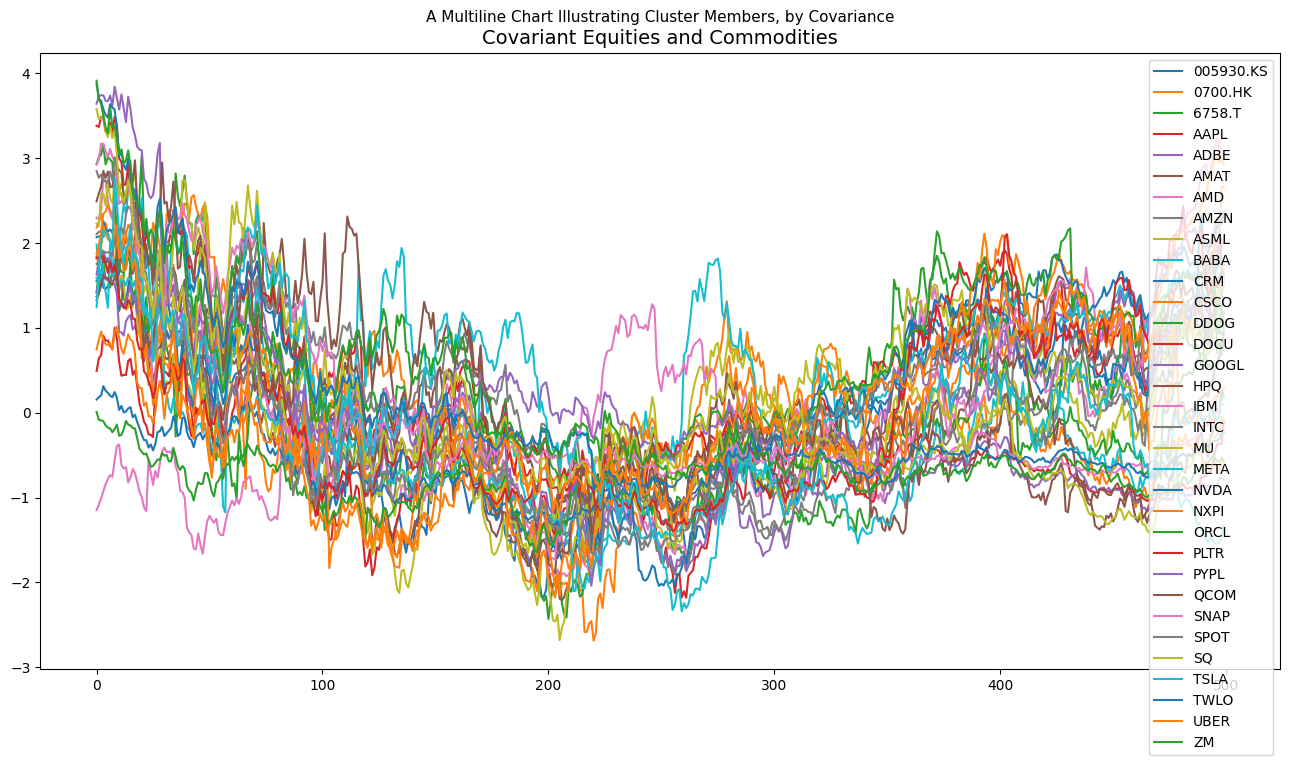

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()
scaled_gdf = pd.DataFrame(scaler.fit_transform(gdf), columns=gdf.columns)

# plot the dataframe
fig, ax = plt.subplots(figsize=(16, 8))
scaled_gdf.plot.line(ax=ax)

# add title and subtitle
ax.set_title('Covariant Equities and Commodities', fontsize=14)
ax.text(0.5, 1.05, 'A Multiline Chart Illustrating Cluster Members, by Covariance',
        horizontalalignment='center',
        fontsize=11,
        transform=ax.transAxes)
# show the plot
plt.show()
